In [1]:
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import seaborn as sns

# Extract the data from the SAMHSA.gov 

In [2]:
# Creating a url variable to use in request to fetch the data from the web
url = "https://www.samhsa.gov/data/sites/default/files/reports/rpt35323/NSDUHDetailedTabs2020v25/NSDUHDetailedTabs2020v25/NSDUHDetTabsSect8pe2020.htm"

In [3]:
# Fetching the data from the web throughurl request
r = requests.get(url)

In [4]:
#Check the results
r

<Response [200]>

In [5]:
# Craete a dataframe to get the tables
df = pd.read_html(url)[4]
df.head(10)

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
1,GEOGRAPHIC REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273
6,COUNTY TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Large Metro,28346,27213,5573,5311,22773,21902,14283,13407,8490,8495
8,Small Metro,15837,17946,3136,3555,12701,14391,7666,8826,5035,5565
9,Nonmetro,7312,7699,1222,1372,6090,6327,3330,3442,2761,2885


# Transform

In [6]:
df.drop([1], axis = 0, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [7]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Geographic/Socioeconomic Characteristic has 0 null values
Column Aged 18+(2019) has 4 null values
Column Aged 18+(2020) has 4 null values
Column Aged 18-25(2019) has 4 null values
Column Aged 18-25(2020) has 4 null values
Column Aged 26+(2019) has 4 null values
Column Aged 26+(2020) has 4 null values
Column Aged 26-49(2019) has 4 null values
Column Aged 26-49(2020) has 4 null values
Column Aged 50+(2019) has 4 null values
Column Aged 50+(2020) has 4 null values


In [8]:
#Checking datatype
df.dtypes


Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                             object
Aged 18+(2020)                             object
Aged 18-25(2019)                           object
Aged 18-25(2020)                           object
Aged 26+(2019)                             object
Aged 26+(2020)                             object
Aged 26-49(2019)                           object
Aged 26-49(2020)                           object
Aged 50+(2019)                             object
Aged 50+(2020)                             object
dtype: object

In [9]:
# df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [10]:
#Drop the Geographic/Socioeconomic Characteristic
cols = df.columns.drop('Geographic/Socioeconomic Characteristic')
cols

Index(['Aged 18+(2019)', 'Aged 18+(2020)', 'Aged 18-25(2019)',
       'Aged 18-25(2020)', 'Aged 26+(2019)', 'Aged 26+(2020)',
       'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)',
       'Aged 50+(2020)'],
      dtype='object')

In [11]:
# Covert data types for all numeric columns to int64
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
df.dtypes

Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                              Int64
Aged 18+(2020)                              Int64
Aged 18-25(2019)                            Int64
Aged 18-25(2020)                            Int64
Aged 26+(2019)                              Int64
Aged 26+(2020)                              Int64
Aged 26-49(2019)                            Int64
Aged 26-49(2020)                            Int64
Aged 50+(2019)                              Int64
Aged 50+(2020)                              Int64
dtype: object

In [12]:
# Drop Unnecessary age brackets
df.drop(['Aged 26+(2019)', 'Aged 26+(2020)', 'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)', 'Aged 50+(2020)'], axis = 1, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
0,TOTAL,51495,52859,9930,10238
2,Northeast,8608,8383,1611,1677
3,Midwest,11497,11866,2284,2192
4,South,18212,18616,3544,3637
5,West,13178,13994,2491,2733


In [14]:
# Set 'Geographic/Socioeconomic Characteristic' as the index column 
df = df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
TOTAL,51495,52859,9930,10238
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733


In [15]:
## Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [16]:
#Print missing values
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Aged 18+(2019),5,18.5
Aged 18+(2020),5,18.5
Aged 18-25(2019),5,18.5
Aged 18-25(2020),5,18.5


# EDA (Exploratory Data Analysis)

In [17]:
# Retrieve all tables from the MHA
tables = pd.read_html(url)
tables


[                                         Age Category  \
 0                                               TOTAL   
 1                                               18-25   
 2                                               18-20   
 3                                               21-25   
 4                                         26 or Older   
 5                                               26-49   
 6                                               26-29   
 7                                               30-34   
 8                                               35-39   
 9                                               40-44   
 10                                              45-49   
 11                                        50 or Older   
 12                                              50-54   
 13                                              55-59   
 14                                              60-64   
 15                                        65 or Older   
 16  * = low p

In [18]:
#Remove last row from the dataframe
df2 = df.iloc[:-1 , :]
df2.shape

(26, 4)

In [19]:
# Drop nans
df.dropna()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
TOTAL,51495,52859,9930,10238
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733
Large Metro,28346,27213,5573,5311
Small Metro,15837,17946,3136,3555
Nonmetro,7312,7699,1222,1372
Urbanized,3100,3360,596,627


In [20]:
# Create a Geographic dataframe only
geographic_df = df.iloc[1:5]
geographic_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
Northeast,8608,8383,1611,1677
Midwest,11497,11866,2284,2192
South,18212,18616,3544,3637
West,13178,13994,2491,2733


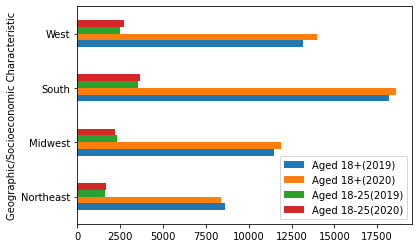

In [21]:
# Visualize our dataframe
from matplotlib import figure
geographic_df.plot.barh()
plt.savefig("Resources/Regional_Ami.jpg")

In [22]:
# Converting specific column to Series
series = geographic_df.iloc[:,1]
series

Geographic/Socioeconomic Characteristic
Northeast     8383
Midwest      11866
South        18616
West         13994
Name: Aged 18+(2020), dtype: Int64

In [23]:
# Exract regional educational information and create a dataframe
education_df = df.iloc[17:21]
education_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020)
Geographic/Socioeconomic Characteristic,,,,
< High School,5505,5552,1107,933
High School Graduate,11705,13170,2839,2794
Some College/Associate‘s Degree,18250,18339,4584,4662
College Graduate,16034,15798,1400,1850


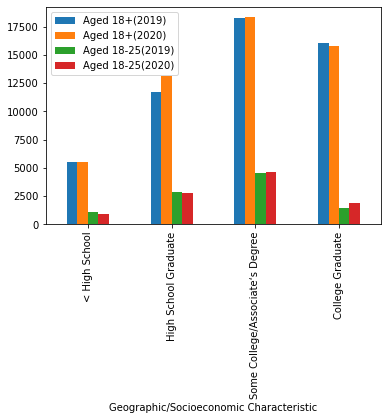

In [24]:
# Visualize Regional educational data
from matplotlib import figure
from matplotlib.pyplot import ylabel
education_df.plot.bar()
ylabel = "Total # of AMI"

/Users/uzmasyed/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

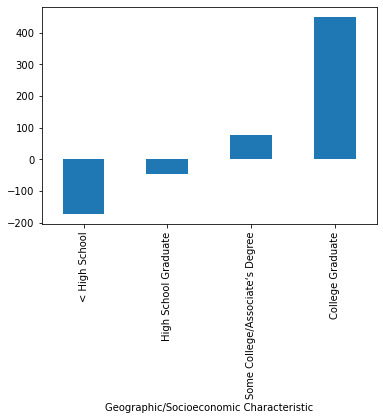

In [25]:
# Find the change in total number of cases for 2020 amongst adults 18-25
change_rate_18_25 = (education_df['Aged 18-25(2020)']-education_df['Aged 18-25(2019)'])

education_df['growth_rate'] = change_rate_18_25

education_df.sort_values(by=['growth_rate'],ascending=False)
change_rate_18_25.plot.bar()

In [26]:
# Save dataframe as a csv file 
df.to_csv('Resources/table4.csv')

<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

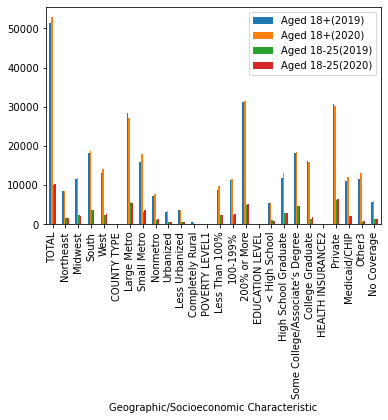

In [27]:
# Plot the dataframe for a quick overview
df2.plot.bar()

In [28]:
# Load the clean covid csv file and create a dataframe
df3 = pd.read_csv('Resources/covid_cleaned.csv')
df3.head()

,Unnamed: 0,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,0,AK,76993509,0,0,263307,0,406984,0,0,1109,0
1,1,AL,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
2,2,AR,314253729,0,0,871467,247126,4678130,0,0,11316,2830
3,3,AS,618133,0,0,6505,0,2546,0,0,31,0
4,4,AZ,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994


In [29]:
# Set 'state' column as index
df3.set_index('state')

,Unnamed: 0,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
state,,,,,,,,,,,
AK,0,76993509,0,0,263307,0,406984,0,0,1109,0
AL,1,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
AR,2,314253729,0,0,871467,247126,4678130,0,0,11316,2830
AS,3,618133,0,0,6505,0,2546,0,0,31,0
AZ,4,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994
CA,5,3305642241,3159478078,146164163,10035241,534865,41363286,20529490,0,91795,0
CO,6,499355370,458969735,40385635,1546422,142342,5328084,4672568,655516,12783,1509
CT,7,282636713,256463850,25991615,819915,87368,6071140,4950197,1113088,11051,2211
DC,8,48506690,0,0,157435,0,796495,0,0,1351,0


In [30]:
# Drop Unnecessary columns
df3.drop(['conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'conf_death', 'prob_death', 'new_death', 'pnew_death'], axis = 1, inplace =True)
df3.head()

,Unnamed: 0,state,tot_cases,tot_death
0,0,AK,76993509,406984
1,1,AL,495866086,8946436
2,2,AR,314253729,4678130
3,3,AS,618133,2546
4,4,AZ,762685906,12984264


In [31]:
# Rename the column
df3['State']= df3['state']
df3

,Unnamed: 0,state,tot_cases,tot_death,State
0,0,AK,76993509,406984,AK
1,1,AL,495866086,8946436,AL
2,2,AR,314253729,4678130,AR
3,3,AS,618133,2546,AS
4,4,AZ,762685906,12984264,AZ
5,5,CA,3305642241,41363286,CA
6,6,CO,499355370,5328084,CO
7,7,CT,282636713,6071140,CT
8,8,DC,48506690,796495,DC
9,9,DE,94405711,1378168,DE


In [32]:
# Drop addtional state column
df3.drop(['state'], axis = 1, inplace = True)

In [33]:
# shift column 'State' to first position
first_column = df3.pop('State')  
# insert column using insert(position,column_name,first_column) function
df3.insert(0, 'State', first_column)
df3


,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
3,AS,3,618133,2546
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286
6,CO,6,499355370,5328084
7,CT,7,282636713,6071140
8,DC,8,48506690,796495
9,DE,9,94405711,1378168


In [34]:
# Drop regional and teritorial data points
df3.drop([3,11,13,39, 44,45,47,51,54 ], axis =0, inplace = True)
df3.head()

,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286


In [35]:
# Assign FIPS to each state for machine learning model
Fi_List = ['01', '02', '04','05','06','08', '09','10', '11', '12', '13', '15', '16','17', '18', '19','20', '21', '22', '23', '24','25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45','46','47', '48', '49', '50', '51', '53', '54', '55', '56']
df3['FIPS'] = Fi_List
df3

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06
6,CO,6,499355370,5328084,08
7,CT,7,282636713,6071140,09
8,DC,8,48506690,796495,10
9,DE,9,94405711,1378168,11
10,FL,10,2202577503,32437927,12


In [36]:
# Set state as index
df3.set_index('State')
df3.head()

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06


In [37]:
# Drop unnecessary columns
df3.drop(['Unnamed: 0'], axis = 1, inplace =True)

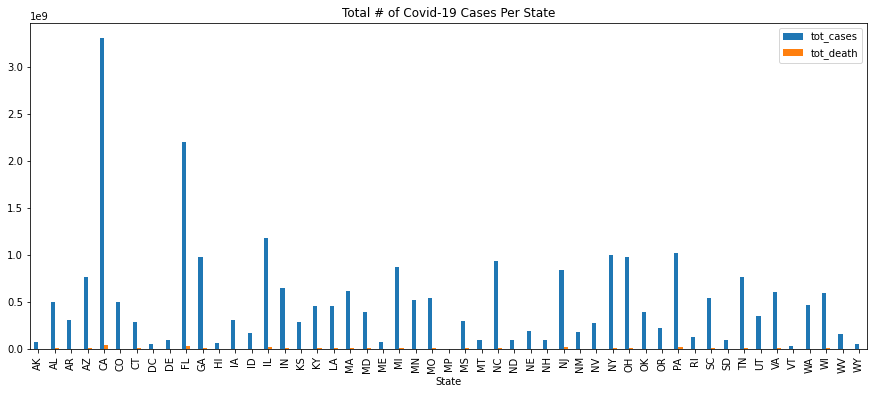

In [112]:
# visualize the dataframe 
df3.plot(kind='bar' , x='State', y = ['tot_cases','tot_death'], title='Total # of Covid-19 Cases Per State', figsize= (15,6))
plt.savefig('Resources/Total_Number_Covis_Cases_per_state.png')

In [39]:
# Get the Covid and AMI merged file
df4 = pd.read_csv('Covid_AMI_Data_Merged.csv')
df4

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
0,0,2017,Alabama,1,712000,0,0
1,1,2017,Alaska,2,94000,0,0
2,2,2017,Arizona,4,920000,0,0
3,3,2017,Arkansas,5,441000,0,0
4,4,2017,California,6,5241000,0,0
...,...,...,...,...,...,...,...
250,250,2021,Virginia,51,1199000,1133238,15601
251,251,2021,Washington,53,1360000,859170,9853
252,252,2021,West Virginia,54,347000,328162,5336
253,253,2021,Wisconsin,55,904000,1120669,11173


In [40]:
#Drop Unnamed column
df4.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [69]:
# Upload Educational attainment data from DOA
Edu_df = pd.read_excel('Education.xls')
Edu_df.head()

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [70]:
# Check the column names
Edu_df.columns

Index(['Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [71]:
# Rename Columns
Edu_df.rename(columns= {'Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020': 'FIPS', 'Unnamed: 1': 'State', 'Unnamed: 2': 'Area name', 'Unnamed: 3' : '<High School', 'Unnamed: 4': 'High School', 'Unnamed: 5' : 'Some college or associates degree', 'Unnamed: 6': 'Bachelors degree or higher'}, inplace = True)
Edu_df.head()

,FIPS,State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [72]:
Edu_df.dropna().reset_index(drop=True)
Edu_df.iloc[:1095,:-2]

,FIPS,State,Area name,<High School,High School
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20"
4,00000,US,United States,25562680,59421420
...,...,...,...,...,...
1090,21131,KY,Leslie County,1622,2904
1091,21133,KY,Letcher County,3497,5669
1092,21135,KY,Lewis County,2105,4041
1093,21137,KY,Lincoln County,3234,7283


In [73]:
#Strip leading and trailing space
Edu_df['Area name'] = Edu_df['Area name'].str.strip()
Edu_df.head()

,FIPS,State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [74]:
#Add total numbers for education attainment per state from county level to state level
all_state_edu = Edu_df.State.unique()
all_state_edu


array([nan, 'State', 'US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'],
      dtype=object)

In [75]:
#Add total numbers for High school per state
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Maine", "Massachusetts", "Maryland", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
High_sch = Edu_df.groupby(['Area name']).sum().reset_index()
for state in x:
    st_list.append(High_sch.loc[High_sch['Area name']== state])
edu2 = pd.concat(st_list)
edu2.reset_index(drop=True, inplace=True)
edu2


,Area name,FIPS,State,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,AK,33176,137486,167807,144967
1,Alabama,01000,AL,438947,1014342,1013673,877044
2,Arkansas,05000,AR,260360,686812,596855,482695
3,Arizona,04000,AZ,587919,1151988,1637451,1468698
4,California,06000,CA,4286538,5431385,7690347,9256873
5,Colorado,08000,CO,308785,827081,1142035,1622853
6,Connecticut,09000,CT,225550,655381,612274,996000
7,District of Columbia,1100011001,DCDC,81622,166694,155706,599950
8,Delaware,10000,DE,63843,210998,182986,222043
9,Florida,12000,FL,1751798,4308542,4535040,4659946


In [76]:
# Drop State column as it is a String
edu2.drop(['State'], axis = 1, inplace = True)
edu2


,Area name,FIPS,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,33176,137486,167807,144967
1,Alabama,01000,438947,1014342,1013673,877044
2,Arkansas,05000,260360,686812,596855,482695
3,Arizona,04000,587919,1151988,1637451,1468698
4,California,06000,4286538,5431385,7690347,9256873
5,Colorado,08000,308785,827081,1142035,1622853
6,Connecticut,09000,225550,655381,612274,996000
7,District of Columbia,1100011001,81622,166694,155706,599950
8,Delaware,10000,63843,210998,182986,222043
9,Florida,12000,1751798,4308542,4535040,4659946


In [77]:
# Rename columns
edu2.rename(columns = {'Area name': 'State'}, inplace = True)
edu2

,State,FIPS,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,33176,137486,167807,144967
1,Alabama,01000,438947,1014342,1013673,877044
2,Arkansas,05000,260360,686812,596855,482695
3,Arizona,04000,587919,1151988,1637451,1468698
4,California,06000,4286538,5431385,7690347,9256873
5,Colorado,08000,308785,827081,1142035,1622853
6,Connecticut,09000,225550,655381,612274,996000
7,District of Columbia,1100011001,81622,166694,155706,599950
8,Delaware,10000,63843,210998,182986,222043
9,Florida,12000,1751798,4308542,4535040,4659946


In [78]:
# Change FIPS datatype from string to int64
edu2['FIPS'] = edu2['FIPS'].astype(str).str[:-3].astype(np.int64)
edu2

,State,FIPS,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,2,33176,137486,167807,144967
1,Alabama,1,438947,1014342,1013673,877044
2,Arkansas,5,260360,686812,596855,482695
3,Arizona,4,587919,1151988,1637451,1468698
4,California,6,4286538,5431385,7690347,9256873
5,Colorado,8,308785,827081,1142035,1622853
6,Connecticut,9,225550,655381,612274,996000
7,District of Columbia,1100011,81622,166694,155706,599950
8,Delaware,10,63843,210998,182986,222043
9,Florida,12,1751798,4308542,4535040,4659946


In [79]:
# Set index and check the shape of dataframe
edu2.set_index(['FIPS'], inplace =True)
edu2.shape

(52, 5)

In [80]:
# Put all states in FIPS order
edu2 = edu2.sort_index()
edu2.head()

,State,<High School,High School,Some college or associates degree,Bachelors degree or higher
FIPS,,,,,
1,Alabama,438947,1014342,1013673,877044
2,Alaska,33176,137486,167807,144967
4,Arizona,587919,1151988,1637451,1468698
5,Arkansas,260360,686812,596855,482695
6,California,4286538,5431385,7690347,9256873


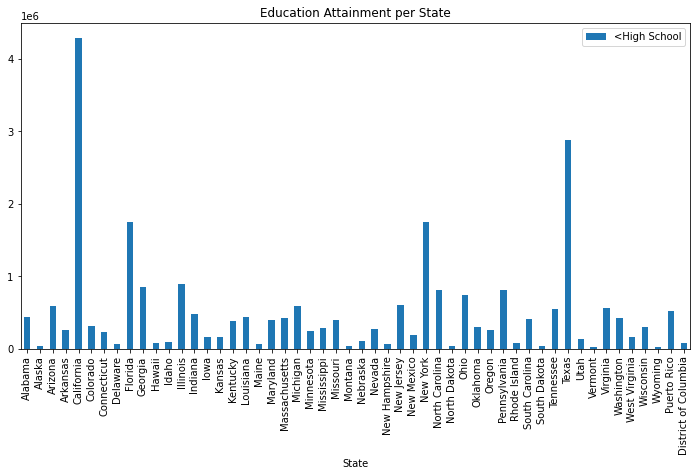

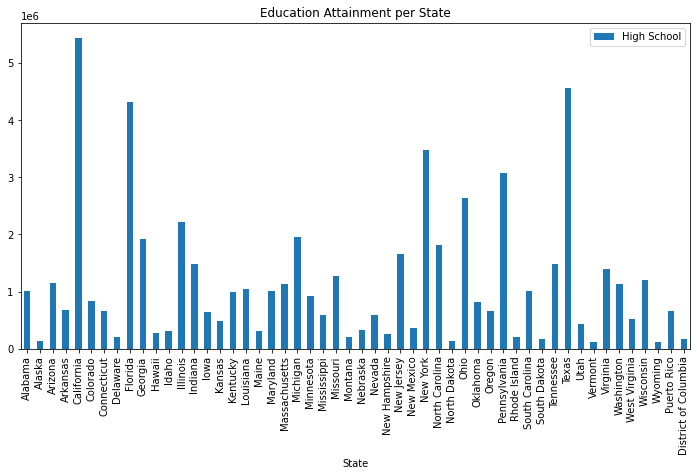

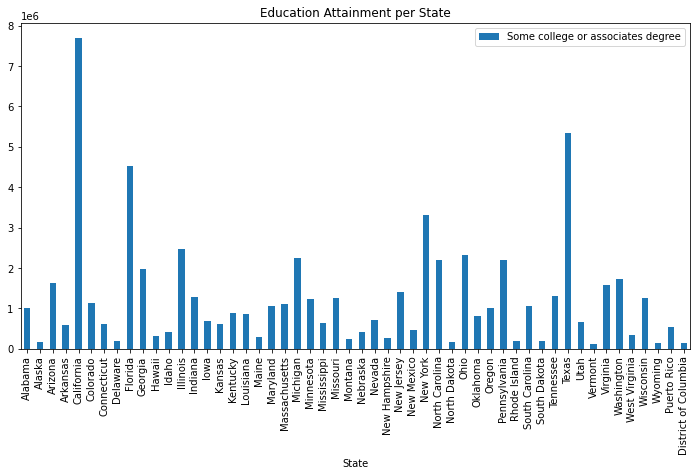

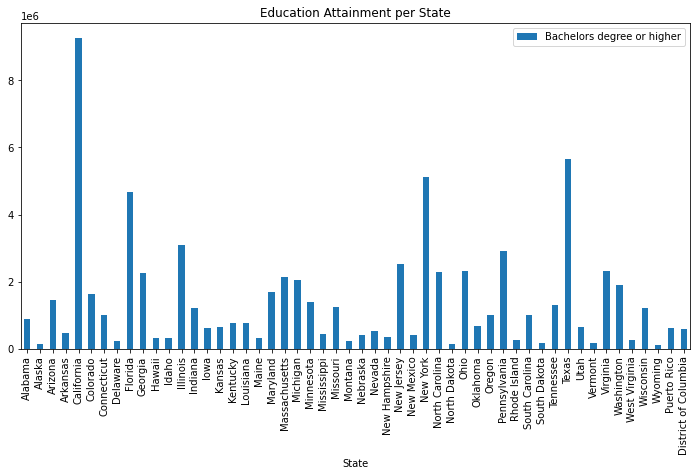

In [83]:
# plotting horizontal bar plots
from matplotlib.pyplot import xlabel
cols=['<High School', 'High School', 'Some college or associates degree', 'Bachelors degree or higher']
for col in cols:
    edu2.plot(kind='bar' , x='State', y = col, title='Education Attainment per State', figsize= (12,6))
    ylabel = 'Total Number'

plt.savefig('Resources/Education Attainment per State.png')



In [84]:
# Only keep the numeric columns for machine learning model
cols= edu2.columns.drop(['State'])
edu2[cols] =edu2[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
edu2.head()

,State,<High School,High School,Some college or associates degree,Bachelors degree or higher
FIPS,,,,,
1,Alabama,438947,1014342,1013673,877044
2,Alaska,33176,137486,167807,144967
4,Arizona,587919,1151988,1637451,1468698
5,Arkansas,260360,686812,596855,482695
6,California,4286538,5431385,7690347,9256873


In [85]:
# Save the file to Resources
edu2.to_csv('Resources/Education_cleaned.csv')

In [86]:
# Get the Covid and AMI combibed data
df4 = pd.read_csv("Covid_AMI_Data_Merged.csv")
df4.head()


,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
0,0,2017,Alabama,1,712000,0,0
1,1,2017,Alaska,2,94000,0,0
2,2,2017,Arizona,4,920000,0,0
3,3,2017,Arkansas,5,441000,0,0
4,4,2017,California,6,5241000,0,0


In [87]:
# Merge EDucation data with Covid and AMI data
edu_ami_df = pd.merge(df4, edu2)
edu_ami_df.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,877044
1,51,2018,Alabama,1,217000,0,0,438947,1014342,1013673,877044
2,102,2019,Alabama,1,680000,0,0,438947,1014342,1013673,877044
3,153,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,877044
4,204,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,877044


In [88]:
# Drop Unnamed column
edu_ami_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [135]:
# plot boxplot to visualize data points 
fig = px.box(edu_ami_df, x='State',y="18_or_Older_AMI_Total")
fig.show()

In [89]:
# Save the file as csv
edu_ami_df.to_csv('Resources/Education_merged.csv')

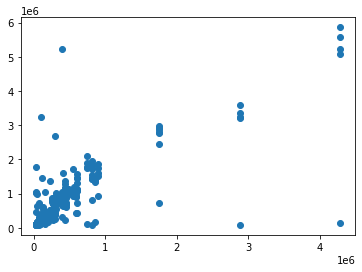

In [90]:
# Plot a scatter graph 
x = edu_ami_df['<High School']
y = edu_ami_df['18_or_Older_AMI_Total']
plt.scatter(edu_ami_df['<High School'], edu_ami_df['18_or_Older_AMI_Total'])
plt.show()

In [91]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [92]:
# Check Correlation
edu_ami_df['<High School'].astype(float).corr(edu_ami_df['18_or_Older_AMI_Total'])

0.7546209888609371

In [93]:
# assign x and y values for linear regression.
x_values = edu_ami_df['<High School']
y_values = edu_ami_df['18_or_Older_AMI_Total']

# Perform linear regression.Plota
(slope, intercept, r_value, p_value, std_err) = linregress(x_values.astype(float), y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is : {r_value:.3f}")
  



y = 0.98x + 392802.89
The p-value is: 0.000
The r-value is : 0.755


In [94]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values ]


In [95]:
x_values.tolist()

[438947,
 438947,
 438947,
 438947,
 438947,
 33176,
 33176,
 33176,
 33176,
 33176,
 587919,
 587919,
 587919,
 587919,
 587919,
 260360,
 260360,
 260360,
 260360,
 260360,
 4286538,
 4286538,
 4286538,
 4286538,
 4286538,
 308785,
 308785,
 308785,
 308785,
 308785,
 225550,
 225550,
 225550,
 225550,
 225550,
 63843,
 63843,
 63843,
 63843,
 63843,
 81622,
 81622,
 81622,
 81622,
 81622,
 1751798,
 1751798,
 1751798,
 1751798,
 1751798,
 848653,
 848653,
 848653,
 848653,
 848653,
 74875,
 74875,
 74875,
 74875,
 74875,
 100189,
 100189,
 100189,
 100189,
 100189,
 898338,
 898338,
 898338,
 898338,
 898338,
 476425,
 476425,
 476425,
 476425,
 476425,
 158401,
 158401,
 158401,
 158401,
 158401,
 165373,
 165373,
 165373,
 165373,
 165373,
 389642,
 389642,
 389642,
 389642,
 389642,
 444176,
 444176,
 444176,
 444176,
 444176,
 66525,
 66525,
 66525,
 66525,
 66525,
 393028,
 393028,
 393028,
 393028,
 393028,
 429794,
 429794,
 429794,
 429794,
 429794,
 596313,
 596313,
 596313

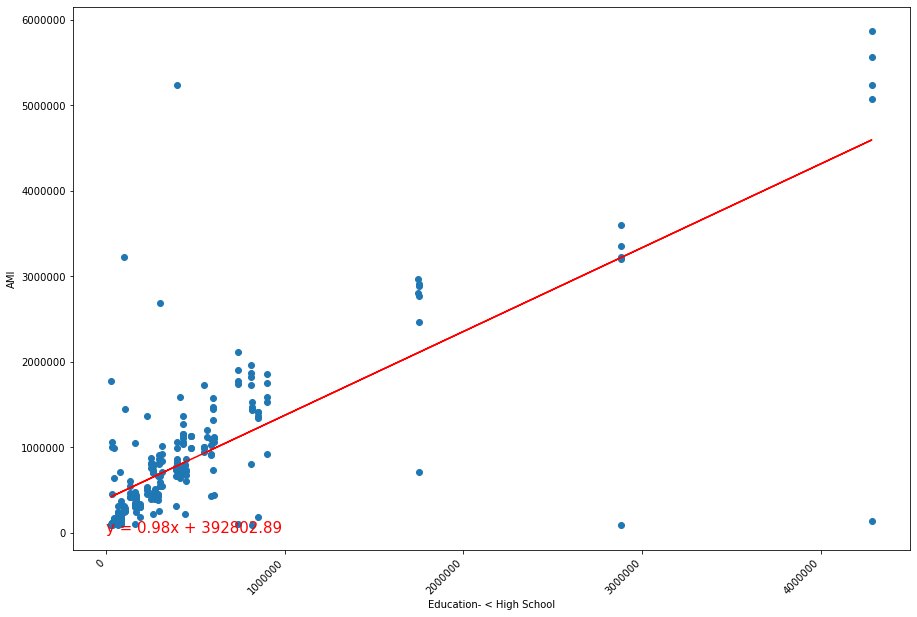

In [96]:
#Import Matplotlib
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.figure(figsize = (15,10))
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values.tolist(),regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (200,500), fontsize=15, color="red")
plt.xlabel('Education- < High School')
plt.ylabel('AMI')
plt.xticks (rotation = 45, ha = 'right')
plt.ticklabel_format(style='plain')
plt.savefig("Resources/Education- < High School.png")
plt.show()

In [97]:
# Get the income and employment data
income_df = pd.read_excel("Unemployment .xlsx")
income_df.columns

Index(['FIPS_code', 'State', 'Area_name', 'Civilian_labor_force_2017',
       'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Civilian_labor_force_2019', 'Employed_2019',
       'Unemployed_2019', 'Unemployment_rate_2019',
       'Civilian_labor_force_2020', 'Employed_2020', 'Unemployed_2020',
       'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Employed_2021',
       'Unemployed_2021', 'Unemployment_rate_2021',
       'Median_Household_Income_2020',
       'Med_HH_Income_Percent_of_State_Total_2020'],
      dtype='object')

In [ ]:
# Drop unnecessary columns from DataFrame
income_df.drop(['Civilian_labor_force_2017', 'Unemployment_rate_2017', 'Civilian_labor_force_2018', 'Unemployment_rate_2018', 'Civilian_labor_force_2019', 'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Unemployment_rate_2021', 'Med_HH_Income_Percent_of_State_Total_2020', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88', 'Unnamed: 89',
       'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93',
       'Unnamed: 94'], axis = 1, inplace = True)
income_df.columns

In [99]:
# Combine each state data from county level to state level
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
income_median_2020 = income_df.groupby(['Area_name']).sum().reset_index()
for state in x:
    st_list.append(income_median_2020.loc[income_median_2020['Area_name']== state])
med_inc = pd.concat(st_list)
med_inc.reset_index(drop=True, inplace=True)
med_inc.head()

,Area_name,FIPS_code,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2000,360589.0,337108.0,23481.0,6.5,355452.0,334241.0,21211.0,6.0,...,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1000,2203458.0,2103873.0,99585.0,4.5,2240477.0,2153080.0,87397.0,3.9,...,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5000,1348088.0,1297854.0,50234.0,3.7,1351686.0,1302629.0,49057.0,3.6,...,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4000,3240111.0,3079700.0,160411.0,5.0,3328189.0,3168469.0,159720.0,4.8,...,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6000,19185366.0,18258064.0,927302.0,4.8,19289507.0,18468143.0,821364.0,4.3,...,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [100]:
# Rename the columns
med_inc.rename(columns = {'Area_name': 'State', 'FIPS_code': 'FIPS'}, inplace = True)
med_inc.head()

,State,FIPS,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2000,360589.0,337108.0,23481.0,6.5,355452.0,334241.0,21211.0,6.0,...,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1000,2203458.0,2103873.0,99585.0,4.5,2240477.0,2153080.0,87397.0,3.9,...,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5000,1348088.0,1297854.0,50234.0,3.7,1351686.0,1302629.0,49057.0,3.6,...,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4000,3240111.0,3079700.0,160411.0,5.0,3328189.0,3168469.0,159720.0,4.8,...,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6000,19185366.0,18258064.0,927302.0,4.8,19289507.0,18468143.0,821364.0,4.3,...,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [101]:
# Make the county zip FIPS code to state FIPS
med_inc['FIPS'] = med_inc['FIPS'].astype(str).str[:-3].astype(np.int64)
med_inc

,State,FIPS,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2,360589.0,337108.0,23481.0,6.5,355452.0,334241.0,21211.0,6.0,...,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1,2203458.0,2103873.0,99585.0,4.5,2240477.0,2153080.0,87397.0,3.9,...,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5,1348088.0,1297854.0,50234.0,3.7,1351686.0,1302629.0,49057.0,3.6,...,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4,3240111.0,3079700.0,160411.0,5.0,3328189.0,3168469.0,159720.0,4.8,...,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6,19185366.0,18258064.0,927302.0,4.8,19289507.0,18468143.0,821364.0,4.3,...,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0
5,Colorado,8,2963790.0,2885980.0,77810.0,2.6,3049640.0,2957690.0,91950.0,3.0,...,3087271.0,2874857.0,212414.0,6.9,3156110.0,2986711.0,169399.0,5.4,77688.0,100.0
6,Connecticut,9,1923711.0,1838833.0,84878.0,4.4,1931495.0,1855969.0,75526.0,3.9,...,1897782.0,1749954.0,147828.0,7.8,1855923.0,1739815.0,116108.0,6.3,79723.0,100.0
7,Delaware,10,475214.0,453949.0,21265.0,4.5,480154.0,462143.0,18011.0,3.8,...,485813.0,449114.0,36699.0,7.6,496430.0,469875.0,26555.0,5.3,71335.0,100.0
8,Florida,12,9972990.0,9544892.0,428098.0,4.3,10107191.0,9734029.0,373162.0,3.7,...,10094878.0,9267151.0,827727.0,8.2,10312768.0,9843057.0,469711.0,4.6,61724.0,100.0
9,Georgia,13,5107889.0,4864813.0,243076.0,4.8,5121172.0,4915713.0,205459.0,4.0,...,5079555.0,4751105.0,328450.0,6.5,5186969.0,4983732.0,203237.0,3.9,62800.0,100.0


In [102]:
# Set FIPS as index
med_inc.set_index(['FIPS'], inplace =True)
med_inc.head()

,State,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS,,,,,,,,,,,,,,,,,,,,,
2,Alaska,360589.0,337108.0,23481.0,6.5,355452.0,334241.0,21211.0,6.0,352883.0,...,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,2203458.0,2103873.0,99585.0,4.5,2240477.0,2153080.0,87397.0,3.9,2271892.0,...,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
5,Arkansas,1348088.0,1297854.0,50234.0,3.7,1351686.0,1302629.0,49057.0,3.6,1365790.0,...,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
4,Arizona,3240111.0,3079700.0,160411.0,5.0,3328189.0,3168469.0,159720.0,4.8,3432476.0,...,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
6,California,19185366.0,18258064.0,927302.0,4.8,19289507.0,18468143.0,821364.0,4.3,19409413.0,...,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [103]:
# Sort FIPS
med_inc = med_inc.sort_index()
med_inc.head()

,State,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS,,,,,,,,,,,,,,,,,,,,,
1,Alabama,2203458.0,2103873.0,99585.0,4.5,2240477.0,2153080.0,87397.0,3.9,2271892.0,...,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Alaska,360589.0,337108.0,23481.0,6.5,355452.0,334241.0,21211.0,6.0,352883.0,...,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
4,Arizona,3240111.0,3079700.0,160411.0,5.0,3328189.0,3168469.0,159720.0,4.8,3432476.0,...,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
5,Arkansas,1348088.0,1297854.0,50234.0,3.7,1351686.0,1302629.0,49057.0,3.6,1365790.0,...,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
6,California,19185366.0,18258064.0,927302.0,4.8,19289507.0,18468143.0,821364.0,4.3,19409413.0,...,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [104]:
# Change the data types
cols= med_inc.columns.drop(['State'])
med_inc[cols] =med_inc[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
med_inc.dtypes

State                                         object
Civilian_labor_force_2017                      Int64
Employed_2017                                  Int64
Unemployed_2017                                Int64
Unemployment_rate_2017                       Float64
Civilian_labor_force_2018                      Int64
Employed_2018                                  Int64
Unemployed_2018                                Int64
Unemployment_rate_2018                       Float64
Civilian_labor_force_2019                      Int64
Employed_2019                                  Int64
Unemployed_2019                                Int64
Unemployment_rate_2019                       Float64
Civilian_labor_force_2020                      Int64
Employed_2020                                  Int64
Unemployed_2020                                Int64
Unemployment_rate_2020                       Float64
Civilian_labor_force_2021                      Int64
Employed_2021                                 

In [105]:
med_inc.shape

(51, 23)

In [106]:
# Save the cleaned file as csv
med_inc.to_csv('Resources/med_inc.csv')
med_inc.shape

(51, 23)

In [139]:
# Merge income data with covid, ami and education data
Ami_edu_inc_cov_df = pd.merge(edu_ami_df, med_inc)
Ami_edu_inc_cov_df.columns

Index(['Year', 'State', 'FIPS', '18_or_Older_AMI_Total', 'Tot_Cases',
       'Toth_Deaths', '<High School', 'High School',
       'Some college or associates degree', 'Bachelors degree or higher',
       'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017',
       'Unemployment_rate_2017', 'Civilian_labor_force_2018', 'Employed_2018',
       'Unemployed_2018', 'Unemployment_rate_2018',
       'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019',
       'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Employed_2020',
       'Unemployed_2020', 'Unemployment_rate_2020',
       'Civilian_labor_force_2021', 'Employed_2021', 'Unemployed_2021',
       'Unemployment_rate_2021', 'Median_Household_Income_2020',
       'Med_HH_Income_Percent_of_State_Total_2020'],
      dtype='object')

In [142]:
# Check Total numbers for AMI, Total Covid Cases and median house hold income per state
Col_list= ['18_or_Older_AMI_Total', 'Tot_Cases', 'Median_Household_Income_2020']
fig = px.line(Ami_edu_inc_cov_df, x='State', y= Col_list, markers=True)
fig.show()

In [108]:
# Save the merged dataframe as csv
Ami_edu_inc_cov_df.to_csv('Resources/all_data_merged.csv')

In [109]:
# Check our data stats
Ami_edu_inc_cov_df.describe()

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Civilian_labor_force_2017,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
count,244.000000,244.000000,2.440000e+02,2.440000e+02,244.000000,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,...,2.440000e+02,2.440000e+02,2.440000e+02,244.000000,2.440000e+02,2.440000e+02,2.440000e+02,244.000000,244.000000,244.0
mean,2019.024590,28.971311,8.837541e+05,2.972449e+05,4585.491803,4.946183e+05,1.156101e+06,1.259940e+06,1.405860e+06,3.111405e+06,...,3.124005e+06,2.872695e+06,2.513099e+05,7.336885,3.138344e+06,2.971534e+06,1.668102e+05,4.789344,66389.532787,100.0
std,1.419808,15.641403,9.546953e+05,6.804304e+05,10364.517523,7.371652e+05,1.171331e+06,1.400157e+06,1.650598e+06,3.496158e+06,...,3.491736e+06,3.166863e+06,3.305450e+05,1.883552,3.518530e+06,3.291239e+06,2.329260e+05,1.203411,10866.021035,0.0
min,2017.000000,1.000000,8.300000e+04,0.000000e+00,0.000000,2.520100e+04,1.121830e+05,1.131120e+05,1.106990e+05,2.938020e+05,...,2.937220e+05,2.767390e+05,1.698300e+04,4.100000,2.904040e+05,2.773720e+05,1.127500e+04,2.500000,47368.000000,100.0
25%,2018.000000,17.000000,2.577500e+05,0.000000e+00,0.000000,1.061840e+05,3.240980e+05,4.110910e+05,3.646850e+05,8.397760e+05,...,8.977390e+05,8.487410e+05,6.385200e+04,6.100000,9.170560e+05,8.793290e+05,3.822600e+04,3.800000,59145.000000,100.0
50%,2019.000000,29.000000,6.780000e+05,0.000000e+00,0.000000,2.952070e+05,8.270810e+05,8.953210e+05,8.770440e+05,2.075682e+06,...,2.062175e+06,1.886999e+06,1.478280e+05,7.150000,2.062492e+06,1.949403e+06,1.029670e+05,4.750000,64608.000000,100.0
75%,2020.000000,42.000000,1.071250e+06,3.179180e+05,4916.000000,5.477330e+05,1.479648e+06,1.405825e+06,1.907238e+06,3.724520e+06,...,3.741684e+06,3.390249e+06,3.284500e+05,8.200000,3.750870e+06,3.535478e+06,2.032370e+05,5.700000,75489.000000,100.0
max,2021.000000,56.000000,5.864000e+06,5.477529e+06,75847.000000,4.286538e+06,5.431385e+06,7.690347e+06,9.256873e+06,1.918537e+07,...,1.893112e+07,1.699667e+07,1.934450e+06,13.500000,1.892319e+07,1.754194e+07,1.381250e+06,7.300000,88589.000000,100.0


In [114]:
# Regional Analysis
reg_df = pd.read_csv("Regional_Totals.csv")
reg_df.head()

,Unnamed: 0,Region,2017_AMI_Total,2018_AMI_Total,2019_AMI_Total,2020_AMI_Total,2021_AMI_Total
0,0,South,15985000,17581000,16374000,16995000,17704000
1,1,West,10483000,10994000,10606000,11681000,12449000
2,2,Northeast,7745000,7680000,7804000,8135000,8525000
3,3,Midwest,9480000,7438000,9252000,10263000,10945000


In [115]:
# Drop Unnammed column
reg_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [123]:
# import the libraries
import plotly.express as px
import pandas as pd
# create the simples histogram
px.histogram(reg_df, y=["2019_AMI_Total", "2021_AMI_Total"])

In [143]:
# Plot regional changes of AMI over time
fig = px.line(reg_df, x='Region', y=reg_df.columns[3:6], markers=True)
fig.update_layout(title_text='Comparison for AMI Total in Three Years-2019-2021', title_x=0.5)
fig.show()